<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загружаем-dataset" data-toc-modified-id="Загружаем-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загружаем dataset</a></span></li><li><span><a href="#Подготавливаем-признаки" data-toc-modified-id="Подготавливаем-признаки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготавливаем признаки</a></span></li><li><span><a href="#Выполняем-преобразование-признаков" data-toc-modified-id="Выполняем-преобразование-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выполняем преобразование признаков</a></span></li><li><span><a href="#Разделяем-выборку-на-train-и-test" data-toc-modified-id="Разделяем-выборку-на-train-и-test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Разделяем выборку на train и test</a></span></li><li><span><a href="#Выбираем-модель" data-toc-modified-id="Выбираем-модель-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выбираем модель</a></span></li><li><span><a href="#Обучаем-модель" data-toc-modified-id="Обучаем-модель-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучаем модель</a></span></li><li><span><a href="#Оцениваем-качество-предсказания-на-test'e" data-toc-modified-id="Оцениваем-качество-предсказания-на-test'e-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Оцениваем качество предсказания на test'e</a></span></li><li><span><a href="#Визуализируем-ROC" data-toc-modified-id="Визуализируем-ROC-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Визуализируем ROC</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

### Загружаем dataset

In [2]:
train_sample = pd.read_csv('./bank_scoring_train.csv.gz', sep='\t', compression='gzip')

In [3]:
train_sample.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.975614,39,1,0.678552,1850.0,4,0,0,0,3.0
1,0,0.006634,75,0,0.082087,10500.0,21,0,1,0,0.0
2,0,0.227432,48,1,0.202145,6059.0,9,0,1,0,3.0
3,0,0.290217,59,0,0.674392,4400.0,6,0,2,0,0.0
4,0,0.000000,80,0,0.000000,2596.0,2,0,0,0,1.0


SeriousDlqin2yrs - Лицо, которое выходит на просрочку. Флаг выхода на просрочку через 90 дней
RevolvingUtilizationOfUnsecuredLines - Общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости, и без задолженности по кредитам, таким как автокредиты, деленные на сумму кредитных лимитов
age - Возраст заёмщика в годах
NumberOfTime30-59DaysPastDueNotWorse - Сколько раз заемщик просрочил выплату не более, чем на 30-59 дней, за последние 2 года.
DebtRatio - Ежемесячные платежи по долгам, алименты и прожиточные расходы, делённые на месячный валовый доход
MonthlyIncome - Ежемесячный доход
NumberOfOpenCreditLinesAndLoans - Количество открытых кредитов (например, автокредит или закладная, кредитные карты и т.д.)
NumberOfTimes90DaysLate - Сколько раз заёмщик просрочил выплату на 90 дней и более.
NumberRealEstateLoansOrLines - Количество ипотечных кредитов и кредитов на недвижимость
NumberOfTime60-89DaysPastDueNotWorse - Сколько раз заёмщик просрочил выплату не более, чем на 60-89 дней, за последние 2 года.
NumberOfDependents - Количество иждивенцев в семье, исключая самого заёмщика (супруга, дети и т.д.)

### Подготавливаем признаки

In [4]:
train_sample.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.003465,-0.107130,0.120440,-0.001070,-0.020474,-0.025130,0.106295,0.000773,0.091719,0.046431
RevolvingUtilizationOfUnsecuredLines,-0.003465,1.000000,-0.004646,-0.001527,-0.000202,0.008861,-0.012173,-0.001111,0.007651,-0.001104,0.005536
age,-0.107130,-0.004646,1.000000,-0.054489,0.003186,0.040811,0.188150,-0.052406,0.064399,-0.048832,-0.207707
NumberOfTime30-59DaysPastDueNotWorse,0.120440,-0.001527,-0.054489,1.000000,-0.001520,-0.010398,-0.047928,0.977477,-0.026400,0.981383,0.001812
DebtRatio,-0.001070,-0.000202,0.003186,-0.001520,1.000000,-0.026469,0.006250,-0.002682,0.016319,-0.001573,0.002627
MonthlyIncome,-0.020474,0.008861,0.040811,-0.010398,-0.026469,1.000000,0.093186,-0.013138,0.121412,-0.011333,0.067107
NumberOfOpenCreditLinesAndLoans,-0.025130,-0.012173,0.188150,-0.047928,0.006250,0.093186,1.000000,-0.074245,0.422222,-0.064080,0.040745
NumberOfTimes90DaysLate,0.106295,-0.001111,-0.052406,0.977477,-0.002682,-0.013138,-0.074245,1.000000,-0.042890,0.990847,-0.004963
NumberRealEstateLoansOrLines,0.000773,0.007651,0.064399,-0.026400,0.016319,0.121412,0.422222,-0.042890,1.000000,-0.036403,0.130398
NumberOfTime60-89DaysPastDueNotWorse,0.091719,-0.001104,-0.048832,0.981383,-0.001573,-0.011333,-0.064080,0.990847,-0.036403,1.000000,-0.006511


In [26]:
#y = train_sample['SeriousDlqin2yrs'].values

In [27]:
#X = train_sample[['RevolvingUtilizationOfUnsecuredLines', 
                  'age', 
                  'NumberOfTime30-59DaysPastDueNotWorse',
                  'DebtRatio',
                  'MonthlyIncome',
                  'NumberOfOpenCreditLinesAndLoans',
                  'NumberOfTimes90DaysLate',
                  'NumberRealEstateLoansOrLines',
                  'NumberOfTime60-89DaysPastDueNotWorse',
                  'NumberOfDependents']].values

In [5]:
X = train_sample.drop(('SeriousDlqin2yrs'), axis=1)  # Выбрасываем столбец 'class'.      
y = train_sample['SeriousDlqin2yrs']
feature_names = X.columns
print(feature_names)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


### Выполняем преобразование признаков

In [6]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [7]:
#min_max_scaler = MinMaxScaler()
scaler = StandardScaler()

In [8]:
#X = min_max_scaler.fit_transform(X)
scaledX = scaler.fit_transform(X)

### Выполняем кросс-валидацию

In [9]:
from sklearn.cross_validation import KFold

records_count = y.count() #  кросс-валидация по 5 блокам с перемешиванием
kf = KFold(n=records_count, n_folds=5, shuffle=True)

C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Блок с основными функциями и алгоритмами

In [10]:
import math
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_score
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb



def calc(estimator, trainX, trainY):
    predicted_trainY = estimator.predict_proba(trainX)[:, 1]
    #print(roc_auc_score(y, predicted_trainY))
    return roc_auc_score(trainY, predicted_trainY)



#Оценка путем перекрестной проверки для разных значений регуляризации
def Log_Regr_value(C_value):
    clf_log = LogisticRegression(penalty='l2', C=C_value)
    return cross_val_score(clf_log, scaledX, y, cv=kf, scoring=calc).mean()
#cv-генератор перекрестной проверки, оценкой является mean() ранее просчитанных выборок testX



def check_qual_log_diff_C():
    best_C = 0
    best_qual = 0    
    for i in range(-4, 2):
        C = math.pow(10, i)
        qual = Log_Regr_value(C)
        print('C=', C, ', quality=', qual)
        if qual > best_qual:
           best_qual = qual
           best_C = C
    return(best_C, best_qual)  

### Находим наилучший коэф регуляризации для лог регрессии

In [11]:
the_best_log = check_qual_log_diff_C()
print('Лучшее качество =', the_best_log[1], 'при С=',  the_best_log[0])
new_C = the_best_log[0]

C= 0.0001 , quality= 0.6822971241499176
C= 0.001 , quality= 0.6768042156228326
C= 0.01 , quality= 0.6949743169117552
C= 0.1 , quality= 0.6971111395015296
C= 1.0 , quality= 0.6966200961262929
C= 10.0 , quality= 0.6965618122380719
Лучшее качество = 0.6971111395015296 при С= 0.1


### Настраиваем алгоритмы

In [21]:
clf_log = LogisticRegression(penalty='l2', C=new_C)
clf_tree = DecisionTreeClassifier(max_depth=10)
clf_rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
clf_boost = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4)

### Разделяем выборку на train и test, обучаем алгоритмы на train

In [13]:
#from sklearn.model_selection import train_test_split

In [22]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.3, random_state = 42)

clf_log.fit(x_train, y_train)
clf_rf.fit(x_train, y_train)
clf_tree.fit(x_train, y_train)
clf_boost.fit(x_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=5,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Выбираем модель

### Оцениваем качество предсказания на test'e

In [23]:
y_score_log = clf_log.predict_proba(x_test)[:, 1]
y_score_rf = clf_rf.predict_proba(x_test)[:,1]
y_score_tree = clf_tree.predict_proba(x_test)[:, 1]
y_score_boost = clf_boost.predict_proba(x_test)[:, 1]

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve

In [25]:
auc_log = roc_auc_score(y_score=y_score_log, y_true=y_test)
auc_rf = roc_auc_score(y_score=y_score_rf, y_true=y_test)
auc_tree = roc_auc_score(y_score=y_score_tree, y_true=y_test)
auc_boost = roc_auc_score(y_score=y_score_boost, y_true=y_test)

In [26]:
print(auc_log)
print(auc_rf)
print(auc_tree)
print(auc_boost)

0.711303562493719
0.9226079890379899
0.8233561352792486
0.8274601855000696


### Визуализируем ROC

In [27]:
import matplotlib.pyplot as plt
import sklearn.metrics as mtr

fpr, tpr, thresholds = mtr.roc_curve(y_test,y_score_log)
fpr_2, tpr_2, thresholds_2 = mtr.roc_curve(y_test,y_score_tree)

AUC_log: 0.711
AUC_tree: 0.823


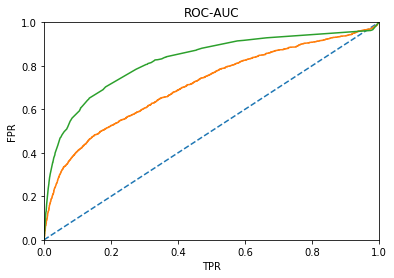

In [28]:
print('AUC_log: %.3f' % auc_log)
print('AUC_tree: %.3f' % auc_tree)


# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr)
plt.plot(fpr_2, tpr_2)

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title('ROC-AUC')
# show the plot
plt.show()
